<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/5G_energy_consumption_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('/content/5G_energy_consumption_dataset.csv')

In [ ]:
df.head(30)

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
5,20230101 070000,B_0,82.959641,0.351585,0.0,7.101719
6,20230101 080000,B_0,91.031390,0.759298,0.0,7.101719
7,20230101 090000,B_0,78.176383,0.887798,0.0,7.101719
8,20230101 100000,B_0,72.645740,0.624745,0.0,7.101719
9,20230101 140000,B_0,66.666667,0.437926,0.0,7.101719


In [ ]:
df.tail(50)

,Time,BS,Energy,load,ESMODE,TXpower
87727,20230106 020000,B_795,40.657698,0.273532,0.0,6.876682
87728,20230106 040000,B_795,37.967115,0.127936,0.0,6.876682
87729,20230106 060000,B_795,41.405082,0.131862,0.0,6.876682
87730,20230106 080000,B_795,47.533632,0.232128,0.0,6.876682
87731,20230106 090000,B_795,47.384155,0.410851,0.0,6.876682
87732,20230106 100000,B_795,49.327354,0.364096,0.0,6.876682
87733,20230106 130000,B_795,48.281016,0.528851,0.0,6.876682
87734,20230106 140000,B_795,46.636771,0.420638,0.0,6.876682
87735,20230106 150000,B_795,45.142003,0.351287,0.0,6.876682
87736,20230106 170000,B_795,45.440957,0.520936,0.0,6.876682


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0a11260961fcbe9c913a2f004b526f185d8b319950105f0d338fd7982540113c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title='Profiling Report')
profile.to_file('/content/5G_energy_consumption_dataset.csv.html')
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:01<00:00,  5.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['BS']=le.fit_transform(df['BS'])

In [ ]:
df.head(30)

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,0,56.053812,0.175436,0.0,7.101719
5,20230101 070000,0,82.959641,0.351585,0.0,7.101719
6,20230101 080000,0,91.031390,0.759298,0.0,7.101719
7,20230101 090000,0,78.176383,0.887798,0.0,7.101719
8,20230101 100000,0,72.645740,0.624745,0.0,7.101719
9,20230101 140000,0,66.666667,0.437926,0.0,7.101719


In [ ]:
x=df[['TXpower','load']]
y=df['Energy']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate metrics
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, Y_pred)

# Print results
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

NameError: name 'y_test' is not defined

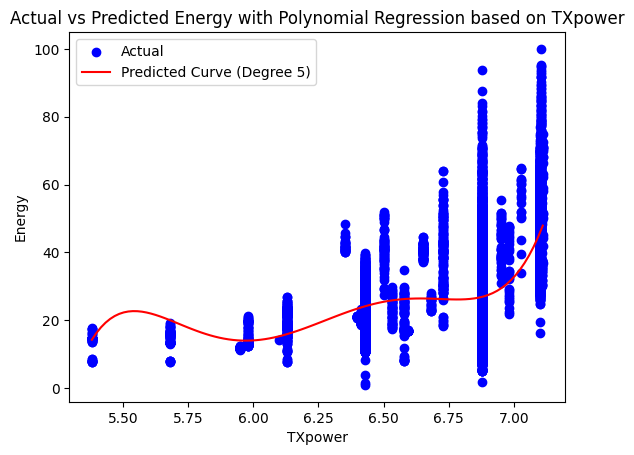

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming you have x_train, x_test, y_train, y_test from your previous steps

poly_features = PolynomialFeatures(degree=5)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)


poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

feature_to_plot = 'TXpower'

# 4. Create a range of x values to plot the smooth curve
# We'll create a series of evenly spaced points within the range of the feature
x_range = np.linspace(x_test[feature_to_plot].min(), x_test[feature_to_plot].max(), 100).reshape(-1, 1)


mean_load = x_test['load'].mean()
x_range_df = pd.DataFrame(x_range, columns=[feature_to_plot])
x_range_df['load'] = mean_load # Add the dummy 'load' column


x_range_df = x_range_df[x_test.columns] # Ensure the order matches x_test

# Transform the x_range using the same polynomial features
x_range_poly = poly_features.transform(x_range_df)

# 5. Predict the y values for the x_range
y_pred_range = poly_model.predict(x_range_poly)

# 6. Plot the actual data points
plt.scatter(x_test[feature_to_plot], y_test, color='blue', label='Actual')

# 7. Plot the predicted curve
# We plot against the original x_range values
plt.plot(x_range, y_pred_range, color='red', label=f'Predicted Curve (Degree 5)')

# Add labels and title
plt.xlabel(feature_to_plot)
plt.ylabel('Energy')
plt.title(f'Actual vs Predicted Energy with Polynomial Regression based on {feature_to_plot}')
plt.legend()
plt.show()

insights based on the features and target for the polynomial regression:

'TXpower' and 'load' are the key input features for predicting 'Energy'.
Both features likely have a direct impact on energy consumption.
Polynomial regression captures non-linear relationships between features and energy.
The model considers interactions and higher-order terms of 'TXpower' and 'load'.
Improved performance over linear regression implies a non-linear link.
The relationship between features and energy likely exhibits curvature.
Energy consumption might not change linearly with changes in 'TXpower' or 'load'.
Interactions between 'TXpower' and 'load' might be significant.
The model captures complex behaviors beyond simple additive effects.
The analysis confirms the relevance of these features for energy prediction.